In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
def get_line_points(x0, y0, x1, y1):
    points = []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy

    while True:
        points.append((x0, y0))
        if x0 == x1 and y0 == y1:
            break
        e2 = err * 2
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy

    return points

In [3]:
def create_shape(type):
    base = np.zeros((512, 512, 3), np.uint8)
    point_list = []
    if type == 'rectangle':
        offset_x1 = 100 + np.random.randint(0,50)
        offset_x2 = 400 - np.random.randint(0,50)
        offset_y1 = 100 + np.random.randint(0,50)
        offset_y2 = 400 - np.random.randint(0,50)
        point_list = []
        base[offset_y1:offset_y2, offset_x1:offset_x2] = [255, 255, 255] 
        #print(offset_x1, offset_x2, offset_y1, offset_y2)   
        previous_point = (int(np.round((offset_x1 + offset_x2) / 2)) + 20, offset_y1)
        ground_truth = base.copy()
        while previous_point[1] <= offset_y2 + 20:
            x = np.random.randint(previous_point[0]-25, previous_point[0]+25)
            y = np.random.randint(previous_point[1] + 25, previous_point[1] + 50)
            #print('Curr',x,y)
            #print('Prev',previous_point)
            cv2.line(base, previous_point, (x, y), (0, 0, 0), 4)
            cv2.line(base, (previous_point[0] - 4, previous_point[1]), (x - 4, y), (0, 0, 0), np.random.randint(3, 6))

            point_list += get_line_points(previous_point[0], previous_point[1], x, y)
            previous_point = (x,y)
    if type == 'circle':
        center = (256, 256)
        radius = np.random.randint(50, 115)
        cv2.circle(base, center, radius, (255, 255, 255), -1)
        ground_truth = base.copy()
        previous_point = (center[1] , center[1] - radius)
        while previous_point[1] <= center[0] + radius:
            x = np.random.randint(previous_point[0]-25, previous_point[0]+25)
            y = np.random.randint(previous_point[1] + 25, previous_point[1] + 50)
            #print('Curr',x,y)
            #print('Prev',previous_point)
            cv2.line(base, previous_point, (x, y), (0, 0, 0), np.random.randint(3, 6))
            point_list += get_line_points(previous_point[0], previous_point[1], x, y)
            previous_point = (x,y)
    

    return base, ground_truth
    plt.imshow(base)

In [20]:
"""os.makedirs('dataset_2d', exist_ok=True)
os.makedirs('dataset_2d/ground_truth', exist_ok=True)
os.makedirs('dataset_2d/input', exist_ok=True)
for i in range(2000):
    base, ground_truth = create_shape('rectangle')
    cv2.imwrite('dataset_2d/input/rectangle_' + str(i) + '.png', base)
    cv2.imwrite('dataset_2d/ground_truth/rectangle_' + str(i) + '.png', ground_truth)
for i in range(2000):
    base, ground_truth = create_shape('circle')
    cv2.imwrite('dataset_2d/input/circle_' + str(i) + '.png', base)
    cv2.imwrite('dataset_2d/ground_truth/circle_' + str(i) + '.png', ground_truth)"""

"os.makedirs('dataset_2d', exist_ok=True)\nos.makedirs('dataset_2d/ground_truth', exist_ok=True)\nos.makedirs('dataset_2d/input', exist_ok=True)\nfor i in range(2000):\n    base, ground_truth = create_shape('rectangle')\n    cv2.imwrite('dataset_2d/input/rectangle_' + str(i) + '.png', base)\n    cv2.imwrite('dataset_2d/ground_truth/rectangle_' + str(i) + '.png', ground_truth)\nfor i in range(2000):\n    base, ground_truth = create_shape('circle')\n    cv2.imwrite('dataset_2d/input/circle_' + str(i) + '.png', base)\n    cv2.imwrite('dataset_2d/ground_truth/circle_' + str(i) + '.png', ground_truth)"

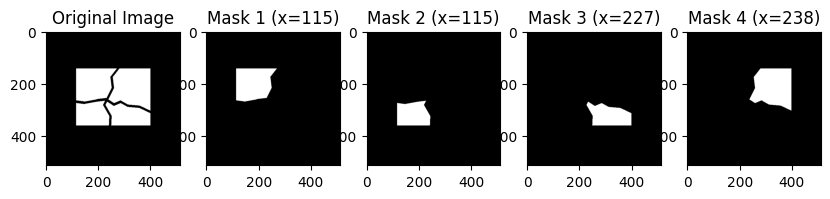

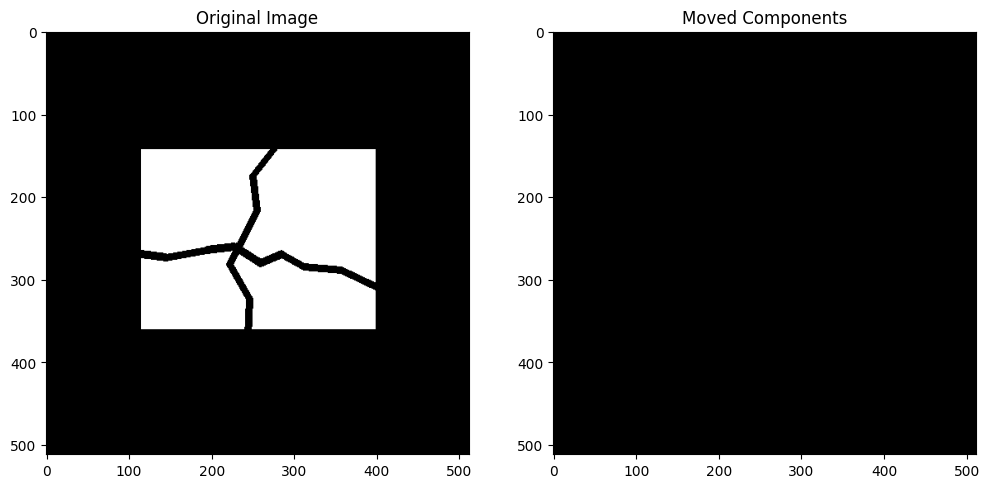

In [47]:
base = np.zeros((512, 512, 3), np.uint8)
type = 'rectangle'
point_list = []
if type == 'rectangle':
    offset_x1 = 100 + np.random.randint(0,50)
    offset_x2 = 400 - np.random.randint(0,50)
    offset_y1 = 100 + np.random.randint(0,50)
    offset_y2 = 400 - np.random.randint(0,50)
    point_list = []
    base[offset_y1:offset_y2, offset_x1:offset_x2] = [255, 255, 255] 
    #print(offset_x1, offset_x2, offset_y1, offset_y2)   
    previous_point = (int(np.round((offset_x1 + offset_x2) / 2)) + 20, offset_y1)
    ground_truth = base.copy()
    while previous_point[1] <= offset_y2 + 20:
        x = np.random.randint(previous_point[0]-25, previous_point[0]+25)
        y = np.random.randint(previous_point[1] + 25, previous_point[1] + 50)
        #print('Curr',x,y)
        #print('Prev',previous_point)
        cv2.line(base, previous_point, (x, y), (0, 0, 0), 4)
        cv2.line(base, (previous_point[0] - 4, previous_point[1]), (x - 4, y), (0, 0, 0), np.random.randint(3, 6))
        previous_point = (x,y)
    previous_point = (offset_x1, int(np.round((offset_y1 + offset_y2) / 2)) + 20)
    while previous_point[0] <= offset_x2 + 20:
        x = np.random.randint(previous_point[0] + 25, previous_point[0] + 50)
        y = np.random.randint(previous_point[1]-25, previous_point[1]+25)
        #print('Curr',x,y)
        #print('Prev',previous_point)
        cv2.line(base, previous_point, (x, y), (0, 0, 0), 4)
        cv2.line(base, (previous_point[0], previous_point[1] - 4), (x, y - 4), (0, 0, 0), np.random.randint(3, 6))
        previous_point = (x,y)

# Convert the image to grayscale
gray = cv2.cvtColor(base, cv2.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Apply connected components to label the image
num_labels, labels = cv2.connectedComponents(binary)

# List to store components and their x-coordinates
components = []

# Iterate over each connected component (excluding background)
for i in range(1, num_labels):  # Start from 1 to skip the background
    mask = np.zeros_like(binary)
    mask[labels == i] = 255
    
    # Get the bounding box of the component
    x, y, w, h = cv2.boundingRect(mask)
    
    # Store the component mask and its x-coordinate
    components.append((mask, x, y, w, h))

# Sort components by their x-coordinate (ascending)
components.sort(key=lambda comp: comp[1])

# Plot the original image and each mask in x-coordinate order
plt.figure(figsize=(10, 10))
plt.subplot(1, num_labels, 1)
plt.imshow(base)
plt.title('Original Image')

# Plot the components in the sorted order
for i, (mask, x, _, _, _) in enumerate(components):
    plt.subplot(1, num_labels, i + 2)
    plt.imshow(mask, cmap='gray')
    plt.title(f'Mask {i + 1} (x={x})')

moved_base = np.zeros_like(base)

# Move each component by a random amount
for i, (mask, x, y, w, h) in enumerate(components):
    plt.imshow(mask, cmap='gray')

# Display the original and moved components
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(base)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(moved_base)
plt.title('Moved Components')


plt.show()

In [24]:
# Create an empty image to place the moved components
moved_base = np.zeros_like(base)

# Move each component by a random amount
for i, (mask, x, y, w, h) in enumerate(components):
    # Calculate a random translation within bounds
    max_x_move = min(512 - (x + w), x)  # Ensure it stays inside the image horizontally
    max_y_move = min(512 - (y + h), y)  # Ensure it stays inside the image vertically
    tx = np.random.randint(-max_x_move, max_x_move + 1)
    ty = np.random.randint(-max_y_move, max_y_move + 1)
    
    # Define the translation matrix
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    
    # Translate the component mask
    translated_mask = cv2.warpAffine(mask, translation_matrix, (512, 512))
    
    # Translate the corresponding area in the original image
    component = base * cv2.merge([translated_mask // 255] * 3)
    
    # Add the moved component to the new base
    moved_base = cv2.bitwise_or(moved_base, component)

# Display the original and moved components
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(base)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(moved_base)
plt.title('Moved Components')

plt.show()

ValueError: not enough values to unpack (expected 5, got 2)